<span style="color:blue">**EX2: Show that the Tanh function and the Sigmoid function are related by the following expression tanh(x) = 2σ(2x) - 1,where σ(x) = 1 / (1 + e^(-x)) is the Sigmoid function.**</span>



The relationship between the hyperbolic tangent (Tanh) function and the sigmoid (σ) function can be shown as follows:

    - Tanh function: tanh(x) = 2σ(2x) - 1
    - Sigmoid function: σ(x) = 1 / (1 + e^(-x))

1. Transformation:
    - By replacing σ(x) into the tanh(x) function, we get:
      - if σ(x) = 1 / (1 + e^(-x)) then σ(2x) can be written as:
        σ(2x) = 1 / (1 + e^(-2x))
      Therefore:
      - tanh(x) = (2 / (1 + e^(-2x))) - 1
      - tanh(x) = (1 - e^(-2x)) / (1 + e^(-2x))

2. Sigmoid Function within Tanh:
    - The expression 1 / (1 + e^(-x)) within the tanh function is the sigmoid function.

3. Final Expression:
    The hyperbolic tangent function is given as
    
     - tanh(x) = sinh(x) / cosh(x)
     
    where cosh(x) = 1/(1 + e^(-2x)) and sinh(x)=1 - e^(-2x)
    
    - tanh(x) = (1 - e^(-2x)) / (1 + e^(-2x)) = sinh(x) / cosh(x)
    

Through this simple transformation, the relationship between the sigmoid and tanh function can be expressed by tanh(x) = 2σ(2x) - 1.


<span style="color:blue">**EX3: Prove both theoretically and numerically that a 2-layers NN initialized with zero weights and biases suffers from the so-called symmetry problem.**</span>

**Theoretically**

z1 = W1 x + b1, z2 = W2 a1 + b2
a1 = σ(z1), a2 = σ(z2)

The outputs will be:
z1=0, 
z2=0 

Therefore the functions will be:

y1=f(0)
y2=f(0)

1. Symmetry Problem: The zero initialization especially zero weights causes the symmetry problem, where all neurons in a layer produce the same output during forward propagation. This symmetry persists throughout training because gradients for weights and biases are also the same for all neurons in each layer, leading to identical updates and perpetuating the symmetry. This affects the back propagation too.

2. Activation Function: Activation functions like sigmoid or tanh have a characteristic where the output saturates towards 0 or 1 when the input is far from zero. With zero initialization, the initial output is close to the center (0.5) of the sigmoid or tanh function's range, leading to outputs around 0.5 for all neurons as shown in the numerical part.




**Numerically**

In [29]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)



In [32]:
#Numerically

class Network(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SymmetricNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        # Initialize weights and biases to zero
        nn.init.zeros_(self.layer1.weight)
        nn.init.zeros_(self.layer1.bias)
        nn.init.zeros_(self.layer2.weight)
        nn.init.zeros_(self.layer2.bias)

    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x

# Initializing the network
input_size = 2
hidden_size = 3
output_size = 1
model = Network(input_size, hidden_size, output_size)

# Generate data
input_data = torch.randn(10, input_size)

# Forward pass
output = model(input_data)

# Print the outputs of neurons in the hidden layer
print("Outputs of neurons in the hidden layer:")
print(input_data)
print(output)


Outputs of neurons in the hidden layer:
tensor([[-2.1391, -1.1966],
        [ 0.9581, -1.5071],
        [ 1.8299, -0.2784],
        [-0.2719, -1.2944],
        [-0.0243, -0.2354],
        [-0.7087, -0.8663],
        [ 0.4296, -1.1874],
        [-0.7468, -0.9320],
        [-0.8579, -0.9647],
        [-0.0991, -0.2994]])
tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


<span style="color:blue">**Ex 4 Write a computer code that can learn the XOR (eXclusive OR) boolean logic operator by means of linear/nonlinear regression. First show that a linear model fails to learn such a mapping, then implement a 2 layers NN and verify its ability to overcome the limitations of the linear model. (HINT: for the linear model, the weights can be estimated by both directly creating and inverting the linear regression matrix or by means of gradient descent; for the nonlinear model, use Pytorch to build and optimize the network).**</span>

**Linear model**

The linear model fails to learn the mapping because the weights become 0 and the bias 0.5 hence the answer from the model below.

In [73]:
#input data
x = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
#output data
y = torch.tensor([[0],[1],[1],[0]],dtype=torch.float32)

In [74]:
# Linear Model
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

linear_model = LinearModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(linear_model.parameters(), lr=0.1)

losses=[]
print("Training Linear Model:")
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = linear_model(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

with torch.no_grad():
    predictions = linear_model(x)
    # predictions = (linear_model(x) > threshold).float()
    # accuracy = (predictions == y).sum().item() / y.size(0)
    # print('Predictions:', predictions)
    # print('Actual outputs:', y) 
    # print('Accuracy:', accuracy)

print("Linear Model Predictions:")
for i in range(len(x)):
    print(f"Ouput: {y[i].tolist()}, Predicted Output: {predictions[i].item()}")

Training Linear Model:
Linear Model Predictions:
Ouput: [0.0], Predicted Output: 0.4999998211860657
Ouput: [1.0], Predicted Output: 0.4999999403953552
Ouput: [1.0], Predicted Output: 0.4999999403953552
Ouput: [0.0], Predicted Output: 0.5000000596046448


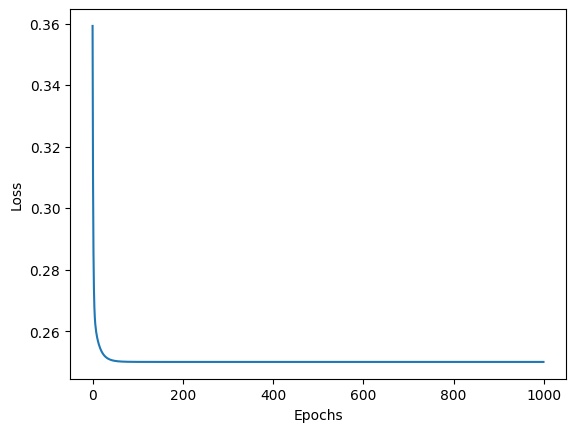

In [40]:
#plot
epochs=1000
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**Nonlinear model using 2-layer neural network**

The model is able to solve the XOR problem because of addition of activation function which introduces non-linarity in the model.

In [77]:
# Nonlinear model using 2-layer neural network
class SingleHiddenLayerNetwork(nn.Module):
    def __init__(self):
        super(SingleHiddenLayerNetwork, self).__init__()
        self.hidden_1 = nn.Linear(2, 2, bias=True)
        self.output = nn.Linear(2, 1, bias=True)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        z1 = self.hidden_1(x)
        a1 = self.relu(z1)
        z2 = self.output(a1)
        a2 = self.sigmoid(z2)
        return a2
    
# set_seed(42)
# nonlinear_model = NonlinearModel()
network = SingleHiddenLayerNetwork()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(network.parameters(), lr=0.1)
epochs=1000
y_pred1=[]
for epoch in range(epochs):
    network.train()
    optimizer.zero_grad()
    yprob = network(x)
    ls = criterion(yprob, y)
    ls.backward()
    optimizer.step()
    y_pred = np.where(yprob[:, 0].detach().numpy() > 0.5, 1, 0)
    y_pred1.append(y_pred)
    # loss += ls.item()
    # accuracy += accuracy_score(y, y_pred)
threshold=0.5
with torch.no_grad():
    predictions = network(x)
    predictions = (network(x) > threshold).float()
    accuracy = (predictions == y).sum().item() / y.size(0)
    print('Predictions:', predictions)
    print('Actual outputs:', y) 
    print('Accuracy:', accuracy)
print("Non-Linear Model Predictions:")
for i in range(len(x)):
    print(f"Ouput: {y[i].tolist()}, Predicted Output: {predictions[i].item()}")

Predictions: tensor([[0.],
        [1.],
        [1.],
        [0.]])
Actual outputs: tensor([[0.],
        [1.],
        [1.],
        [0.]])
Accuracy: 1.0
Non-Linear Model Predictions:
Ouput: [0.0], Predicted Output: 0.0
Ouput: [1.0], Predicted Output: 1.0
Ouput: [1.0], Predicted Output: 1.0
Ouput: [0.0], Predicted Output: 0.0


<span style="color:blue">**Ex 5 Starting from the BasicPytorch.ipynb notebook, compare the behaviour of different optimizers when attempting to find the global minimum of the Rosenbrock function. Repeat the same analysis selecting another popular function for testing optimization algoriths from this list: https://en.wikipedia.org/wiki/Test_functions_for_optimization.**</span>

For this excercise aside from the Rosenbrock function I made use of the Beale function.

Below is a summary of the behaviour of the different optimizers for each function and the code in the following cells.

**Rosenbrock Function**

Constant starting coordinates, learning rate and epochs were used for each optimizer to enable perfomance comparison.

Starting coordinates =[-.25, .5]

learning rate= 1e-2

epochs=400

The table gives a summary of the perfomance of each optimizer.

| Optimizer | Final Step      | Final Function Value | Mean Gradient | Final Gradient |
|-----------|-----------------|----------------------|---------------|----------------|
| Adagrad   | [-0.25308469,   | 1.77125433           | 3.702         | 3.022          |
|           |   0.20522004]   |                      |               |                |
|-----------|-----------------|----------------------|---------------|----------------|
| RMSprop   | [0.97930363,    | 0.0004417            | 0.486         | 0.019          |
|           |   0.95840167]   |                      |               |                |
|-----------|-----------------|----------------------|---------------|----------------|
| SGD       | [0.92412454,    | 0.00591154           | 0.493         | 0.073          |
|           |   0.8508136]    |                      |               |                |
|-----------|-----------------|----------------------|---------------|----------------|
| Adam      | [0.99733248,    | 0.00021718           | 0.917         | 0.210          |
|           |   1.00215639]   |                      |               |                |


Discussion

-Adam has the lowest functional value showing it gives the best perfomance to minimize the cost function.

-Adam also has the lowest final gradient indicating better convergence compared to the others such as Adagrad with higher values.

-Adam optimizer appears to perform the best among the four optimizers based on the the values in the table, as it achieves the lowest final function value, lowest final gradient, and relatively low mean gradient. RMSprop also performs well, followed by SGD, while Adagrad exhibits comparatively inferior performance.

-Adagrad and SGD have smoother gradient and loss function curves which alludes to a smooth and stable convergence to the optimal solution however the final values are higher and Adagrad doesnt not converge at the global minimum as shown in the in the optimization plot. Adagrad required more than 400 iterations to get to the global minimum unlike the other optimizers.

-The optimization trajectories of Adam, SDG, RMSprop seems similar even though Adam has a higher convergence speed.



**Beale Function**

Constant starting coordinates, learning rate and epochs were used for each optimizer to enable perfomance comparison.

Starting coordinates =[0.7, 1.4]

learning rate= 0.001

epochs=2000

The table gives a summary of the perfomance of each optimizer.

| Optimizer | Final Step              | Final Function Value | Mean Gradient | Final Gradient |
|-----------|------------|----------------------|---------------|----------------|
| Adagrad   | [0.6179038, 1.3169501]  | 21.8728              | 40.0058       | 35.6684 |
| Rmsprop   | [2.0277681, 0.17738664] | 0.4816               | 7.9131        | 1.4910 |
| SGD       | [2.7476945, 0.4296143]  | 0.0137               | 0.3826        | 0.1194 |
| Adam      | [2.9999616, 0.50003797] | 4.0253e-08           | 0.0098        | 0.0020 |


Discussion

Adagrad had very high mean gradient and final gradient values meaning convergence to the minimum point takes a lot of time. RMSprop had the second highest final gradient followed by SGD then Adam.

Adagrad and RMSprop required more iterations to reach the minimum point while Adam took the least iterations to converge to the minimum.

SGD and Adam indicate good covergence with low gradients and functional values.

In summary, based on the optimization trajectory and convergence speed Adam seems to outperform the other optimizers in terms of convergence speed and efficiency, followed by SGD, Rmsprop, and Adagrad. 
 




In [77]:
def rosenbrock(x, y):
    a, b = 1, 10
    f = (a - x)**2 + b *(y - x**2)**2
    return f

def surf_rosenbrock(x, y):
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(projection='3d')
    
    # Make the function
    x, y = np.meshgrid(x, y)
    z = rosenbrock(x, y)

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap='gist_heat_r', 
                           linewidth=0, antialiased=False)

    ax.set_zlim(0, 200)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    return fig, ax


def contour_rosenbrock(x, y):
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(projection='3d')
    
    # Make the function
    x, y = np.meshgrid(x, y)
    z = rosenbrock(x, y)

    # Plot the surface.
    surf = ax.contour(x, y, z, 200, cmap='gist_heat_r', vmin=-20, vmax=200,
                      linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    return fig, ax

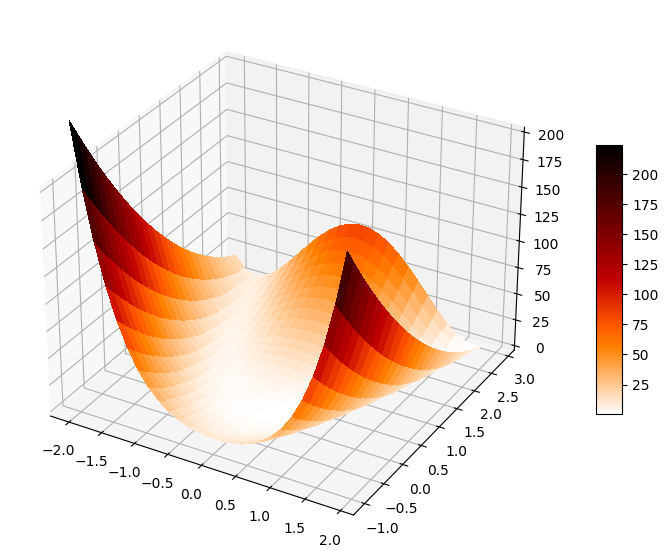

In [78]:
x = np.arange(-2, 2, 0.15)
y = np.arange(-1, 3, 0.15)
surf_rosenbrock(x, y);

In [79]:
class Rosenbrock(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, coords):
        a, b = 1, 10
        x = coords[:, 0]
        y = coords[:, 1]
        f = (a - x)**2 + b *(y - x**2)**2
        return f

/tmp/ipykernel_215/3614708659.py:32: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contour(x, y, z, 200, cmap='gist_heat_r', vmin=-20, vmax=200,


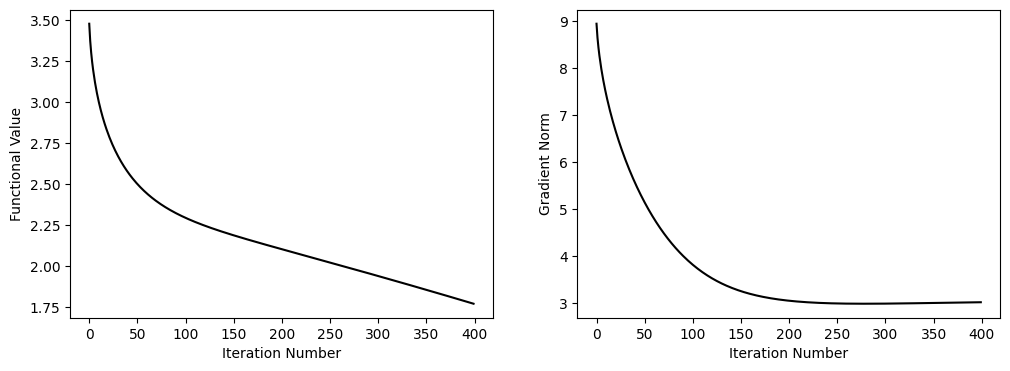

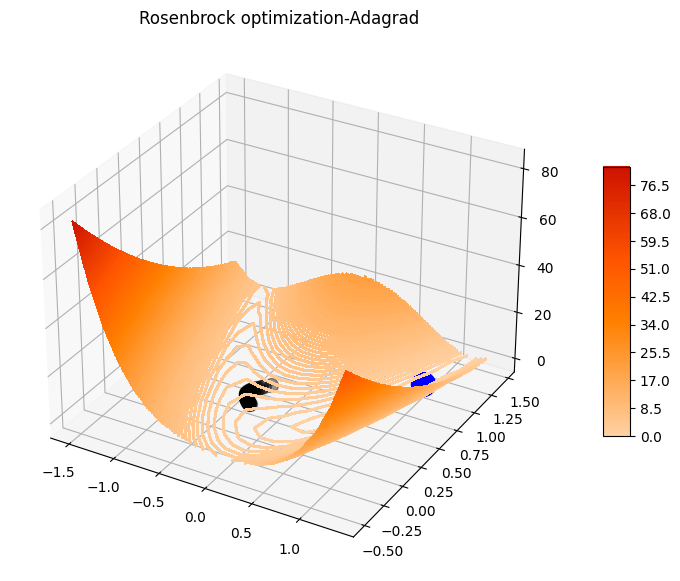

final step  [-0.25308469  0.20522004]
final funct  [1.77125433]
mean grad  3.7024030809044293


In [80]:
rosenbrock_torch = Rosenbrock()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
optimizer = torch.optim.Adagrad([coords], lr=1e-2)
# optimizer = torch.optim.RMSprop([coords], lr=1e-2)
# optimizer = torch.optim.SGD([coords], lr=1e-2)
# optimizer = torch.optim.Adam([coords], lr=1e-2, betas=(0.5, 0.9))

steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = rosenbrock_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k', label='Adagrad')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k', label='Adagrad')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");
plt.savefig('Adagrad0.png', dpi=300)

x = np.arange(-1.5, 1.5, 0.15)
y = np.arange(-0.5, 1.5, 0.15)
_, ax = contour_rosenbrock(x, y)
# print("finished at ", steps[-1])
# Add optimization trajectory
steps = np.array(steps)
ax.plot(steps[::10, 0], steps[::10, 1], '.-k', lw=2, ms=20, alpha=0.4)
ax.scatter(1, 1, c='b', s=300)
ax.set_title('Rosenbrock optimization-Adagrad');
plt.savefig('Adagrad1.png', dpi=300)
plt.show()

#Analysis
print("final step ", steps[-1])
# Calculate precision
precision = np.abs(funcs[-1] - 0)
print("final funct ",precision)
print("mean grad ",np.mean(grads))

/tmp/ipykernel_215/3614708659.py:32: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contour(x, y, z, 200, cmap='gist_heat_r', vmin=-20, vmax=200,


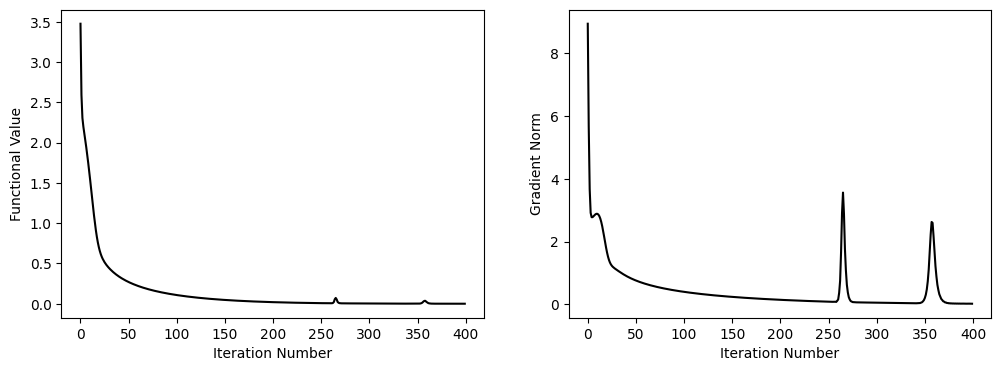

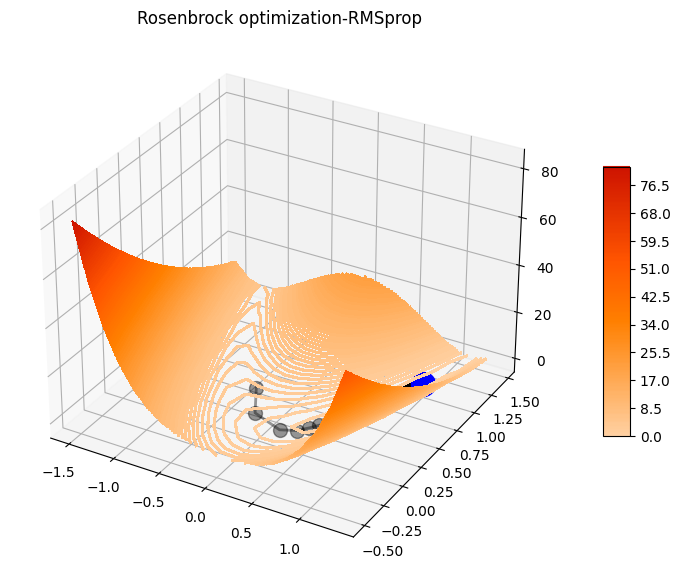

final step  [0.97930363 0.95840167]
final funct  [0.0004417]
mean grad  0.48643576326559695
final grad  0.01904123042468098


In [81]:
rosenbrock_torch = Rosenbrock()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
# optimizer = torch.optim.Adagrad([coords], lr=1e-2)
optimizer = torch.optim.RMSprop([coords], lr=1e-2)
# optimizer = torch.optim.SGD([coords], lr=1e-2)
# optimizer = torch.optim.Adam([coords], lr=1e-2, betas=(0.5, 0.9))


steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = rosenbrock_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k', label='RMSprop')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k', label='RMSprop')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");
plt.savefig('RMSprop0.png', dpi=300)

x = np.arange(-1.5, 1.5, 0.15)
y = np.arange(-0.5, 1.5, 0.15)
_, ax = contour_rosenbrock(x, y)

# Add optimization trajectory
steps = np.array(steps)
ax.plot(steps[::10, 0], steps[::10, 1], '.-k', lw=2, ms=20, alpha=0.4)
ax.scatter(1, 1, c='b', s=300)
ax.set_title('Rosenbrock optimization-RMSprop');
plt.savefig('RMSprop1.png', dpi=300)
plt.show()

#Analysis
print("final step ", steps[-1])
# Calculate precision
precision = np.abs(funcs[-1] - 0)
print("final funct ",precision)
print("mean grad ",np.mean(grads))
print("final grad ",grads[-1])

/tmp/ipykernel_215/3614708659.py:32: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contour(x, y, z, 200, cmap='gist_heat_r', vmin=-20, vmax=200,


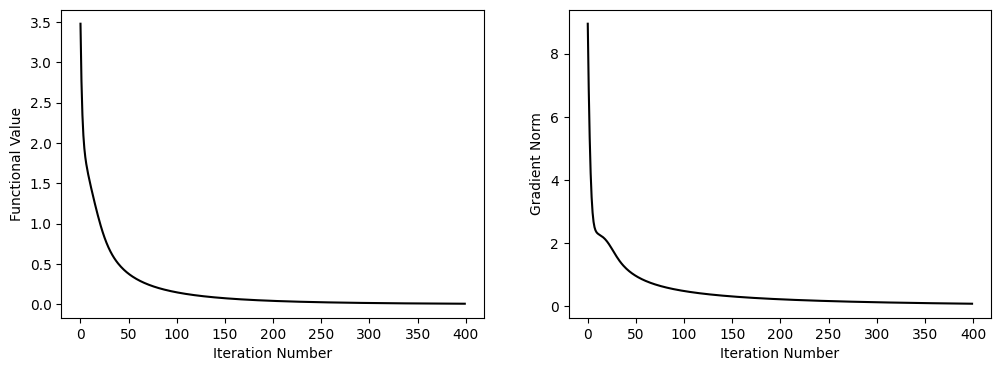

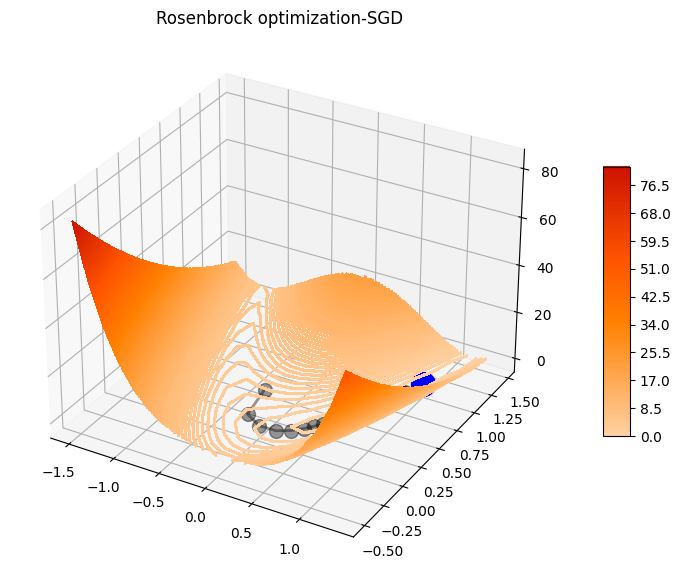

final step  [0.92412454 0.8508136 ]
final funct  [0.00591154]
mean grad  0.49271184440759574
final grad  0.07255985893842767


In [82]:
rosenbrock_torch = Rosenbrock()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
# optimizer = torch.optim.Adagrad([coords], lr=1e-2)
# optimizer = torch.optim.RMSprop([coords], lr=1e-2)
optimizer = torch.optim.SGD([coords], lr=1e-2)
# optimizer = torch.optim.Adam([coords], lr=1e-2, betas=(0.5, 0.9))


steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = rosenbrock_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k', label='SGD')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k', label='SGD')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");
plt.savefig('SGD0.png', dpi=300)

x = np.arange(-1.5, 1.5, 0.15)
y = np.arange(-0.5, 1.5, 0.15)
_, ax = contour_rosenbrock(x, y)

# Add optimization trajectory
steps = np.array(steps)
ax.plot(steps[::10, 0], steps[::10, 1], '.-k', lw=2, ms=20, alpha=0.4)
ax.scatter(1, 1, c='b', s=300)
ax.set_title('Rosenbrock optimization-SGD');
plt.savefig('SGD1.png', dpi=300)
plt.show()

#Analysis
print("final step ", steps[-1])
# Calculate precision
precision = np.abs(funcs[-1] - 0)
print("final funct ",precision)
print("mean grad ",np.mean(grads))
print("final grad ",grads[-1])

/tmp/ipykernel_215/3614708659.py:32: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contour(x, y, z, 200, cmap='gist_heat_r', vmin=-20, vmax=200,


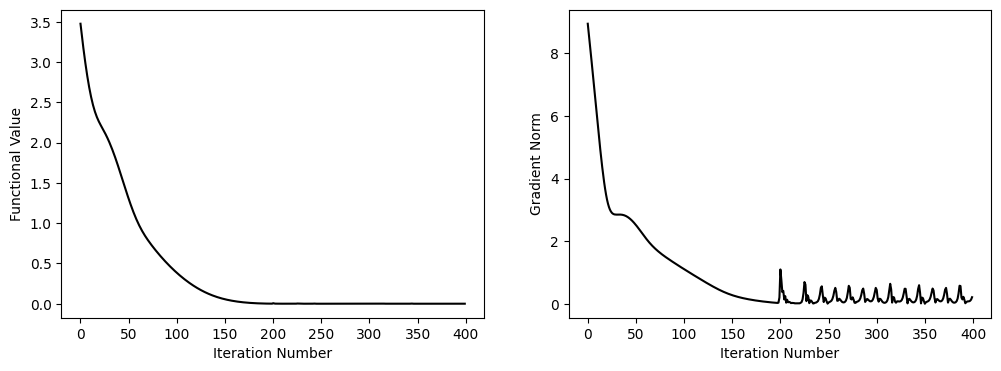

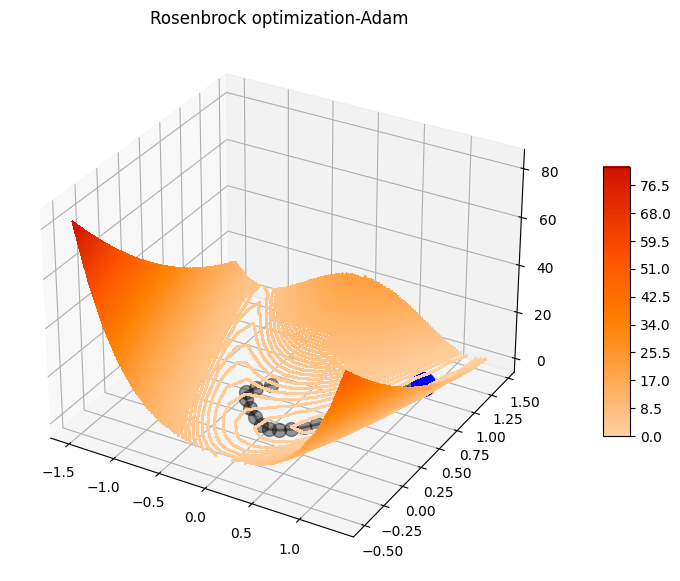

final step  [0.99733248 1.00215639]
final funct  [0.00021718]
mean grad  0.9173110373955039
final grad  0.210194092948533


In [83]:
rosenbrock_torch = Rosenbrock()

coords = np.array([-.25, .5]).reshape(1, 2)
coords = torch.from_numpy(coords)
coords.requires_grad = True
# optimizer = torch.optim.Adagrad([coords], lr=1e-2)
# optimizer = torch.optim.RMSprop([coords], lr=1e-2)
# optimizer = torch.optim.SGD([coords], lr=1e-2)
optimizer = torch.optim.Adam([coords], lr=1e-2, betas=(0.5, 0.9))


steps = []
funcs = []
grads = []
for i in range(400):
    optimizer.zero_grad()
    f = rosenbrock_torch(coords)
    f.backward()
    optimizer.step()
    steps.append(coords.detach().numpy().copy().squeeze())
    funcs.append(f.detach().numpy().copy())
    grads.append(coords.grad.norm().detach().numpy().copy())
    
fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k', label='Adam')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k', label='Adam')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");
plt.savefig('Adam0.png', dpi=300)

x = np.arange(-1.5, 1.5, 0.15)
y = np.arange(-0.5, 1.5, 0.15)
_, ax = contour_rosenbrock(x, y)

# Add optimization trajectory
steps = np.array(steps)
ax.plot(steps[::10, 0], steps[::10, 1], '.-k', lw=2, ms=20, alpha=0.4)
ax.scatter(1, 1, c='b', s=300)
ax.set_title('Rosenbrock optimization-Adam');
plt.savefig('Adam1.png', dpi=300)
plt.show()

#Analysis
print("final step ", steps[-1])
# Calculate precision
precision = np.abs(funcs[-1] - 0)
print("final funct ",precision)
print("mean grad ",np.mean(grads))
print("final grad ",grads[-1])

In [11]:
def beale_function(x, y):
    term1 = (1.5 - x + x*y)**2
    term2 = (2.25 - x + x*y**2)**2
    term3 = (2.625 - x + x*y**3)**2
    return term1 + term2 + term3


In [57]:
#gist_heat_r
def beale(x, y):
    term1 = (1.5 - x + x*y)**2
    term2 = (2.25 - x + x*y**2)**2
    term3 = (2.625 - x + x*y**3)**2
    f =term1 + term2 + term3
    return f

def surf_beale(x, y):
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(projection='3d')
    
    # Make the function
    x, y = np.meshgrid(x, y)
    z = beale(x, y)

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap='jet', 
                           linewidth=0, antialiased=False)

    ax.set_zlim(0, 70000)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    return fig, ax


def contour_beale(x, y):
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(projection='3d')
    
    # Make the function
    x, y = np.meshgrid(x, y)
    z = beale(x, y)

    # Plot the surface.
    surf = ax.contour(x, y, z, 70000, cmap='gist_heat_r', vmin=-20, vmax=70000,
                      linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=10)
    return fig, ax

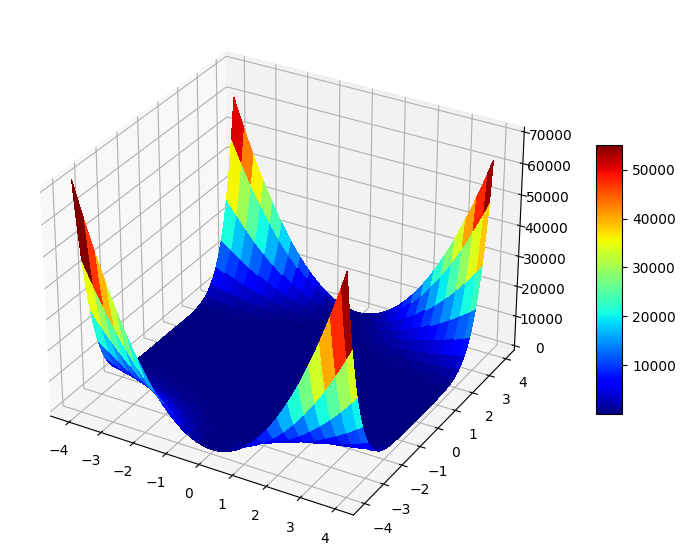

In [43]:
x = np.arange(-4, 4, 0.15)
y = np.arange(-4, 4, 0.15)
surf_beale(x, y);

**Beale Function**

In [68]:
class Beale(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, coords):
        term1 = (1.5 - x + x*y)**2
        term2 = (2.25 - x + x*y**2)**2
        term3 = (2.625 - x + x*y**3)**2
        f =term1 + term2 + term3
        return f

Final Result:
Minimum found at: [0.6179038 1.3169501]
Function value at minimum: 21.872785568237305


Locator attempting to generate 48514 ticks ([0.0, ..., 72769.5]), which exceeds Locator.MAXTICKS (1000).
/tmp/ipykernel_125/2566667550.py:35: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contour(x, y, z, 70000, cmap='gist_heat_r', vmin=-20, vmax=70000,


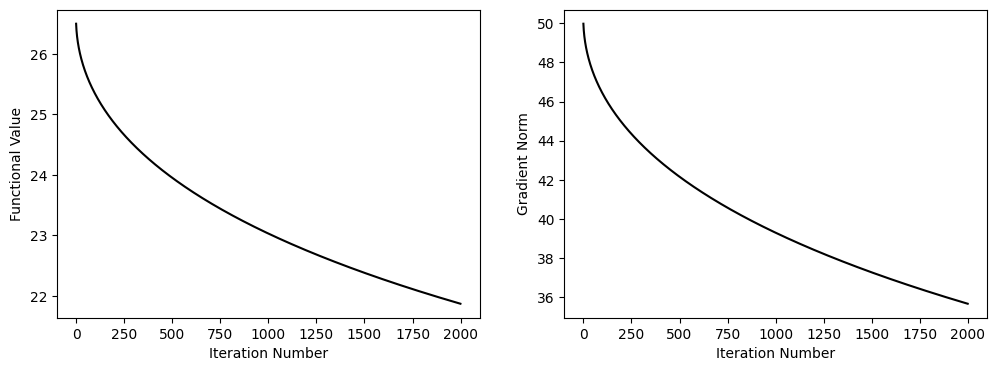

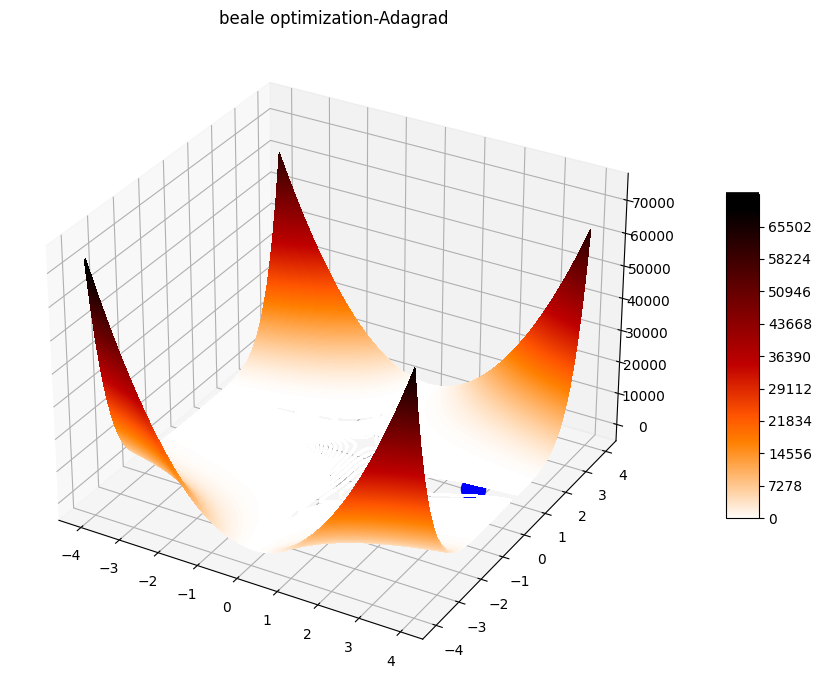

final step  [0.6179038 1.3169501]
final funct  21.872785568237305
mean grad  40.00580379867554
final grad  35.66835021972656


In [69]:


# Define initial guess
x_init = torch.tensor([0.7, 1.4], requires_grad=True)

# Define the Adagrad optimizer
optimizer = optim.Adagrad([x_init], lr=0.001)

# Lists to store steps, function values, and gradients
steps = []
funcs = []
grads = []

# Perform optimization
for _ in range(2000):
    optimizer.zero_grad()
    loss = beale_function(*x_init)
    loss.backward()
    optimizer.step()
    # Record steps, function values, and gradients
    steps.append(x_init.detach().numpy().copy())
    funcs.append(loss.item())
    grads.append(x_init.grad.norm().item())

# Convert lists to numpy arrays
steps = np.array(steps)
funcs = np.array(funcs)
grads = np.array(grads)

# Print the final result
print("Final Result:")
print("Minimum found at:", steps[-1])
print("Function value at minimum:", funcs[-1])

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k', label='Adagrad')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k', label='Adagrad')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");
plt.savefig('beale_Adagrad0.png', dpi=300)

x = np.arange(-4.0, 4.0, 0.15)
y = np.arange(-4.0, 4.0, 0.15)
_, ax = contour_beale(x, y)

# Add optimization trajectory
steps = np.array(steps)
ax.plot(steps[::10, 0], steps[::10, 1], '.-k', lw=2, ms=20, alpha=0.4)
ax.scatter(3,0.5, c='b', s=300)
ax.set_title('beale optimization-Adagrad');
plt.savefig('beale_Adagrad1.png', dpi=300)

plt.tight_layout()
plt.show()

#Analysis
print("final step ", steps[-1])
# Calculate precision
precision = np.abs(funcs[-1] - 0)
print("final funct ",precision)
print("mean grad ",np.mean(grads))
print("final grad ",grads[-1])

Final Result:
Minimum found at: [2.0277681  0.17738664]
Function value at minimum: 0.48163124918937683


Locator attempting to generate 48514 ticks ([0.0, ..., 72769.5]), which exceeds Locator.MAXTICKS (1000).
/tmp/ipykernel_125/2566667550.py:35: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contour(x, y, z, 70000, cmap='gist_heat_r', vmin=-20, vmax=70000,


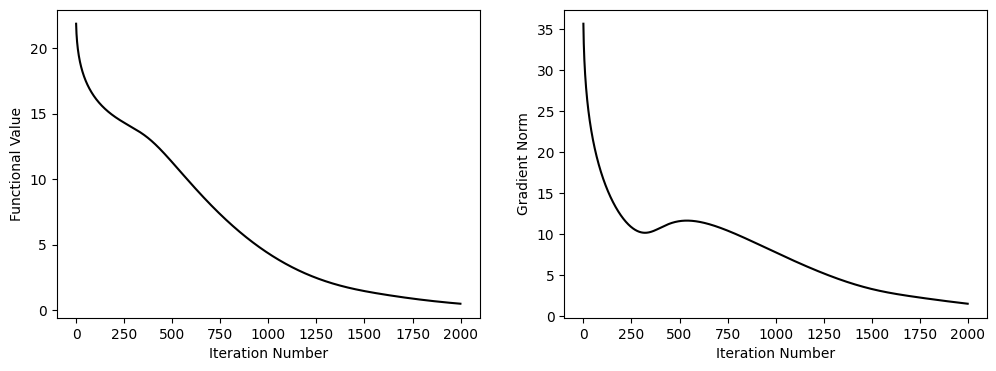

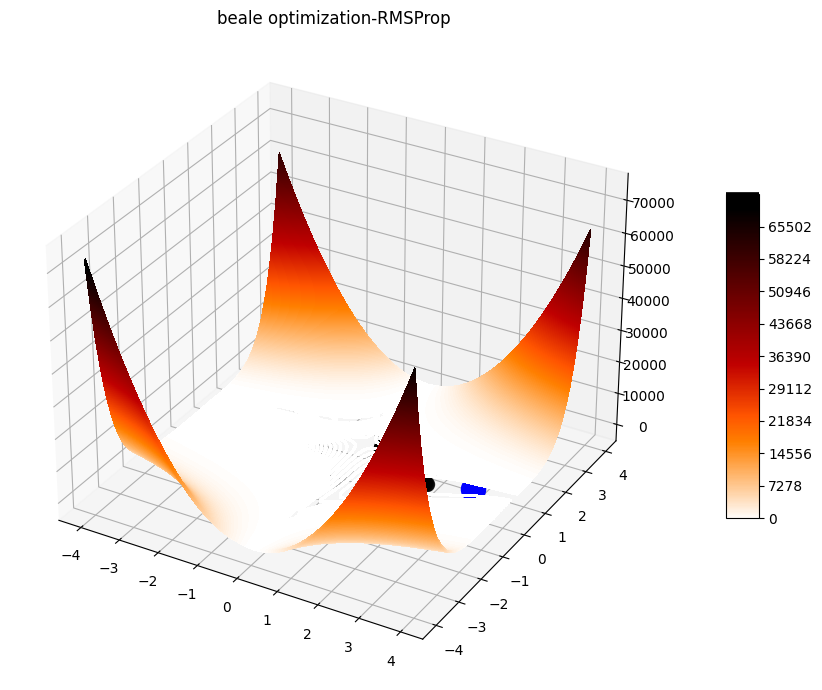

final step  [2.0277681  0.17738664]
final funct  0.48163124918937683
mean grad  7.913072841882705
final grad  1.4910327196121216


In [70]:
# Define the Adagrad optimizer
optimizer = optim.RMSprop([x_init], lr=0.001)

# Lists to store steps, function values, and gradients
steps = []
funcs = []
grads = []

# Perform optimization
for _ in range(2000):
    optimizer.zero_grad()
    loss = beale_function(*x_init)
    loss.backward()
    optimizer.step()
    # Record steps, function values, and gradients
    steps.append(x_init.detach().numpy().copy())
    funcs.append(loss.item())
    grads.append(x_init.grad.norm().item())

# Convert lists to numpy arrays
steps = np.array(steps)
funcs = np.array(funcs)
grads = np.array(grads)

# Print the final result
print("Final Result:")
print("Minimum found at:", steps[-1])
print("Function value at minimum:", funcs[-1])

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k', label='RMSProp')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k', label='RMSProp')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");
plt.savefig('beale_RMSProp0.png', dpi=300)

x = np.arange(-4.0, 4.0, 0.15)
y = np.arange(-4.0, 4.0, 0.15)
_, ax = contour_beale(x, y)

# Add optimization trajectory
steps = np.array(steps)
ax.plot(steps[::10, 0], steps[::10, 1], '.-k', lw=2, ms=20, alpha=0.4)
ax.scatter(3,0.5, c='b', s=300)
ax.set_title('beale optimization-RMSProp');
plt.savefig('beale_RMSProp1.png', dpi=300)

plt.tight_layout()
plt.show()

#Analysis
print("final step ", steps[-1])
# Calculate precision
precision = np.abs(funcs[-1] - 0)
print("final funct ",precision)
print("mean grad ",np.mean(grads))
print("final grad ",grads[-1])

Final Result:
Minimum found at: [2.7476945 0.4296143]
Function value at minimum: 0.013684448786079884


Locator attempting to generate 48514 ticks ([0.0, ..., 72769.5]), which exceeds Locator.MAXTICKS (1000).
/tmp/ipykernel_125/2566667550.py:35: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contour(x, y, z, 70000, cmap='gist_heat_r', vmin=-20, vmax=70000,


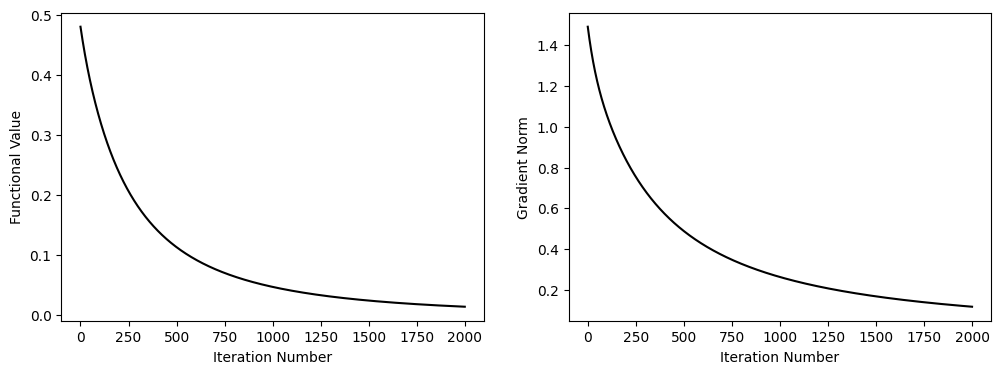

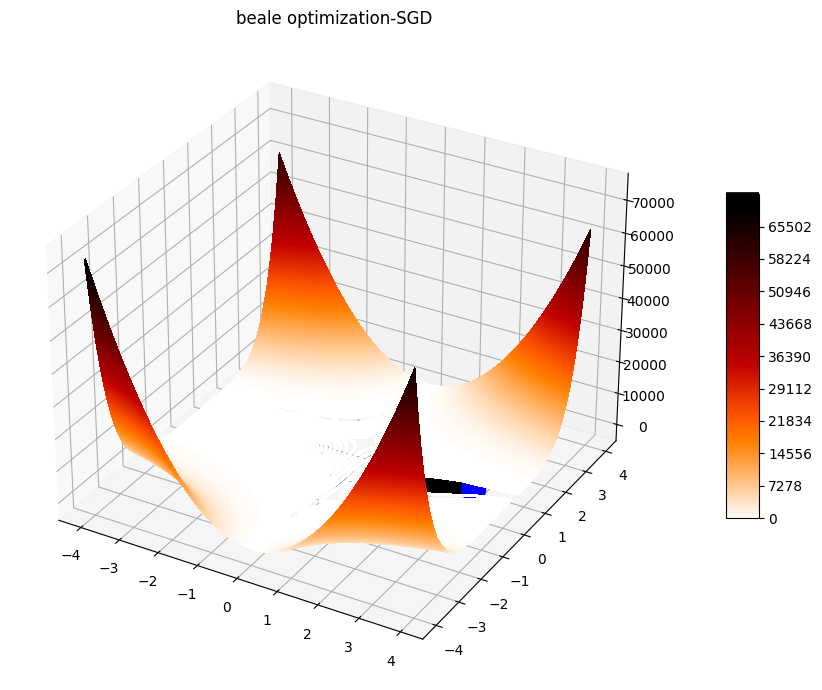

final step  [2.7476945 0.4296143]
final funct  0.013684448786079884
mean grad  0.3825597727447748
final grad  0.11938351392745972


In [71]:
# Define the Adagrad optimizer
optimizer = optim.SGD([x_init], lr=0.001)

# Lists to store steps, function values, and gradients
steps = []
funcs = []
grads = []

# Perform optimization
for _ in range(2000):
    optimizer.zero_grad()
    loss = beale_function(*x_init)
    loss.backward()
    optimizer.step()
    # Record steps, function values, and gradients
    steps.append(x_init.detach().numpy().copy())
    funcs.append(loss.item())
    grads.append(x_init.grad.norm().item())

# Convert lists to numpy arrays
steps = np.array(steps)
funcs = np.array(funcs)
grads = np.array(grads)

# Print the final result
print("Final Result:")
print("Minimum found at:", steps[-1])
print("Function value at minimum:", funcs[-1])

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k', label='SGD')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k', label='SGD')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm")
plt.savefig('beale_SGD0.png', dpi=300)

x = np.arange(-4.0, 4.0, 0.15)
y = np.arange(-4.0, 4.0, 0.15)
_, ax = contour_beale(x, y)

# Add optimization trajectory
steps = np.array(steps)
ax.plot(steps[::10, 0], steps[::10, 1], '.-k', lw=2, ms=20, alpha=0.4)
ax.scatter(3,0.5, c='b', s=300)
ax.set_title('beale optimization-SGD')
plt.savefig('beale_SGD1.png', dpi=300)

plt.tight_layout()
plt.show()

#Analysis
print("final step ", steps[-1])
# Calculate precision
precision = np.abs(funcs[-1] - 0)
print("final funct ",precision)
print("mean grad ",np.mean(grads))
print("final grad ",grads[-1])

Final Result:
Minimum found at: [2.9999616  0.50003797]
Function value at minimum: 4.02534823251699e-08


Locator attempting to generate 48514 ticks ([0.0, ..., 72769.5]), which exceeds Locator.MAXTICKS (1000).
/tmp/ipykernel_125/2566667550.py:35: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contour(x, y, z, 70000, cmap='gist_heat_r', vmin=-20, vmax=70000,


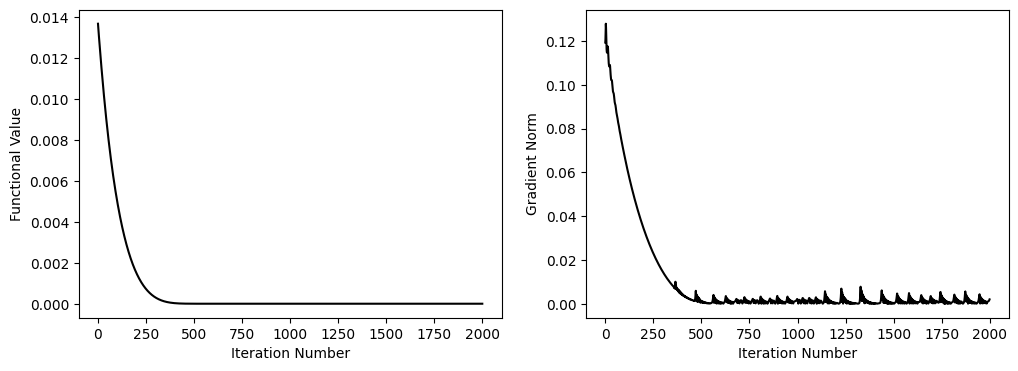

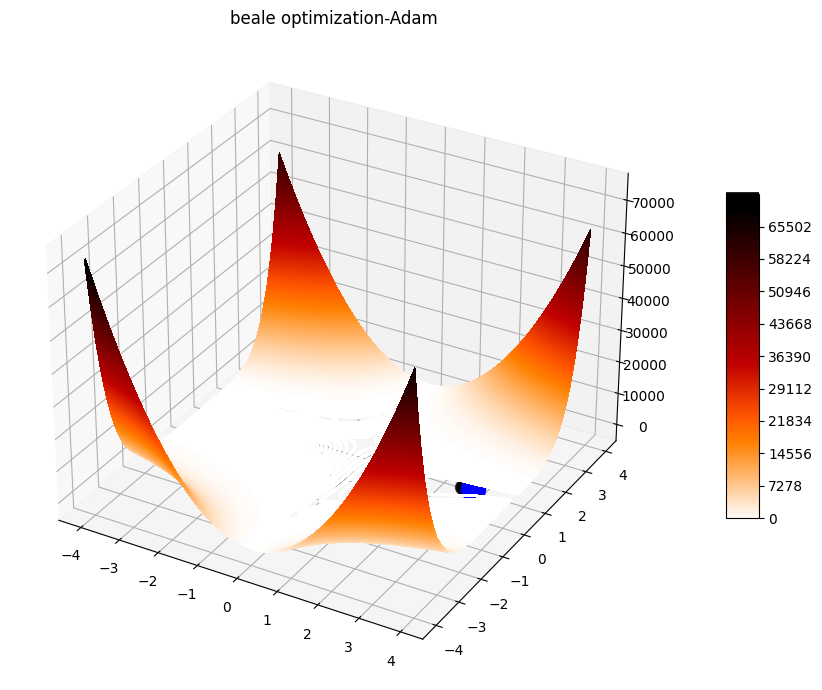

final step  [2.9999616  0.50003797]
final funct  4.02534823251699e-08
mean grad  0.009758320307808219
final grad  0.001983519410714507


In [72]:
# Define the Adagrad optimizer
optimizer = optim.Adam([x_init], lr=0.001,betas=(0.9, 0.99))

# Lists to store steps, function values, and gradients
steps = []
funcs = []
grads = []

# Perform optimization
for _ in range(2000):
    optimizer.zero_grad()
    loss = beale_function(*x_init)
    loss.backward()
    optimizer.step()
    # Record steps, function values, and gradients
    steps.append(x_init.detach().numpy().copy())
    funcs.append(loss.item())
    grads.append(x_init.grad.norm().item())

# Convert lists to numpy arrays
steps = np.array(steps)
funcs = np.array(funcs)
grads = np.array(grads)

# Print the final result
print("Final Result:")
print("Minimum found at:", steps[-1])
print("Function value at minimum:", funcs[-1])

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(funcs, 'k', label='Adam')
ax[0].set_xlabel("Iteration Number")
ax[0].set_ylabel("Functional Value")
ax[1].plot(grads, 'k', label='Adam')
ax[1].set_xlabel("Iteration Number")
ax[1].set_ylabel("Gradient Norm");
plt.savefig('beale_Adam0.png', dpi=300)

x = np.arange(-4.0, 4.0, 0.15)
y = np.arange(-4.0, 4.0, 0.15)
_, ax = contour_beale(x, y)

# Add optimization trajectory
steps = np.array(steps)
ax.plot(steps[::10, 0], steps[::10, 1], '.-k', lw=2, ms=20, alpha=0.4)
ax.scatter(3,0.5, c='b', s=300)
ax.set_title('beale optimization-Adam');
plt.savefig('beale_Adam1.png', dpi=300)

plt.tight_layout()
plt.show()

#Analysis
print("final step ", steps[-1])
# Calculate precision
precision = np.abs(funcs[-1] - 0)
print("final funct ",precision)
print("mean grad ",np.mean(grads))
print("final grad ",grads[-1])